# Principal Component Analysis with Cancer Data

In [197]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import linalg as LA
%matplotlib inline


# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [143]:
col_names = ('Sample_code_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'
,'Class')

data = pd.read_csv('breast-cancer-wisconsin.data.txt', delimiter=",", header=None, names = col_names)
c_data = pd.DataFrame(data)

In [144]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
    
c_data.head()    


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [145]:
c_data.shape

(699, 11)

In [146]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [147]:
c_data.describe(include = 'all')

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


#### Changing the column type of last column as it is a categorical variable. 

In [148]:
#c_data.iloc[:,-1] = c_data.iloc[:,-1].astype('object')

In [149]:
c_data.describe(include = 'all')

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


#### From the above analysis we understand that there is some non-numeric value present in the column 6. Check for unique values  

In [150]:
pd.unique(c_data.iloc[:,6])

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [151]:
indices = c_data[c_data.iloc[:,6]=='?'].index
indices

Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617],
           dtype='int64')

In [152]:
c_data[c_data.iloc[:,6]=='?'].iloc[:,0].count()

16

#### We see that there are 16 such rows with the unknown reading in the column 6.

On visual glance of the data, we notce that that there is no specific pattern that is present. and since the data is related to the sze of the malignant, we cannot assume any value(like mean,median,mode) 

Since, the number of columns is almost about only 2% of the whole data, we can exclude them from the analysis. 
Else, we will impute them with mode of the column, as the readings are between 1-10 and all are integers.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [153]:
#checking the dataset for nan values, and checking the count
#count of the rows having NaN 
c_data[c_data.isna().any(axis=1)].shape[0]
c_data[c_data.isna().any(axis=1)]
#c_data.dropna()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [154]:
#checking for duplicate values in the dataframe
dr_df = c_data[c_data.duplicated(keep = "first")]
#viewing the duplicates
dr_df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [155]:
dr_df.shape[0]

8

We see from the above data that there are 8 columns that are duplicate. We need to remove the duplicates and reset the index value.

In [156]:
# removing and resetting the index values
print(c_data.shape)
c_data = c_data.drop_duplicates().reset_index(drop=True)
print(c_data.shape)

(699, 11)
(691, 11)


In [157]:
c_data.head(10)

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [158]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
print(c_data[c_data.iloc[:,6]=='?'].shape[0])
#to check the mode, creating another dataframe without ? 
c_data_num = c_data[c_data.iloc[:,6]!='?']
c_data_num.shape
#c_data.shape

# Changing the datatype of the column 6 to int from obj
c_data_num.iloc[:,6] = c_data_num.iloc[:,6].astype('int64')
#c_data_num.info()

#check the mode of the values in column 6
mode = c_data_num.iloc[:,6].mode()[0]


#replacing the missing values with mode of the data
c_data.replace({'?': mode},inplace = True)
#changing the type of the data for column 6
#c_data.iloc[:,6].dtype
c_data.iloc[:,6] = c_data.iloc[:,6].astype('int64')

16


In [159]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 11 columns):
Sample_code_number             691 non-null int64
Clump_Thickness                691 non-null int64
Uniformity_of_Cell_Size        691 non-null int64
Uniformity_of_Cell_Shape       691 non-null int64
Marginal_Adhesion              691 non-null int64
Single_Epithelial_Cell_Size    691 non-null int64
Bare_Nuclei                    691 non-null int64
Bland_Chromatin                691 non-null int64
Normal_Nucleoli                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int64(11)
memory usage: 59.5 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [160]:
# Check for correlation of variable
corr = c_data.corr()


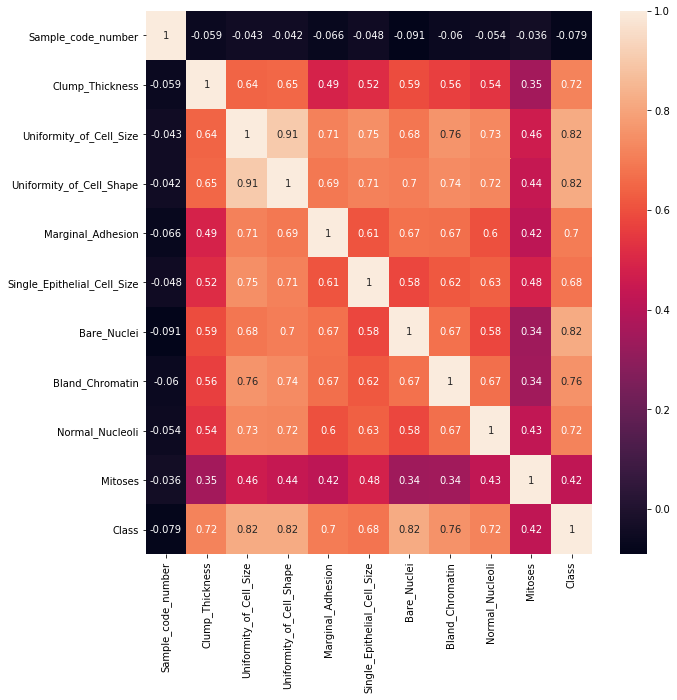

In [161]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True, ax = ax)

In [162]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

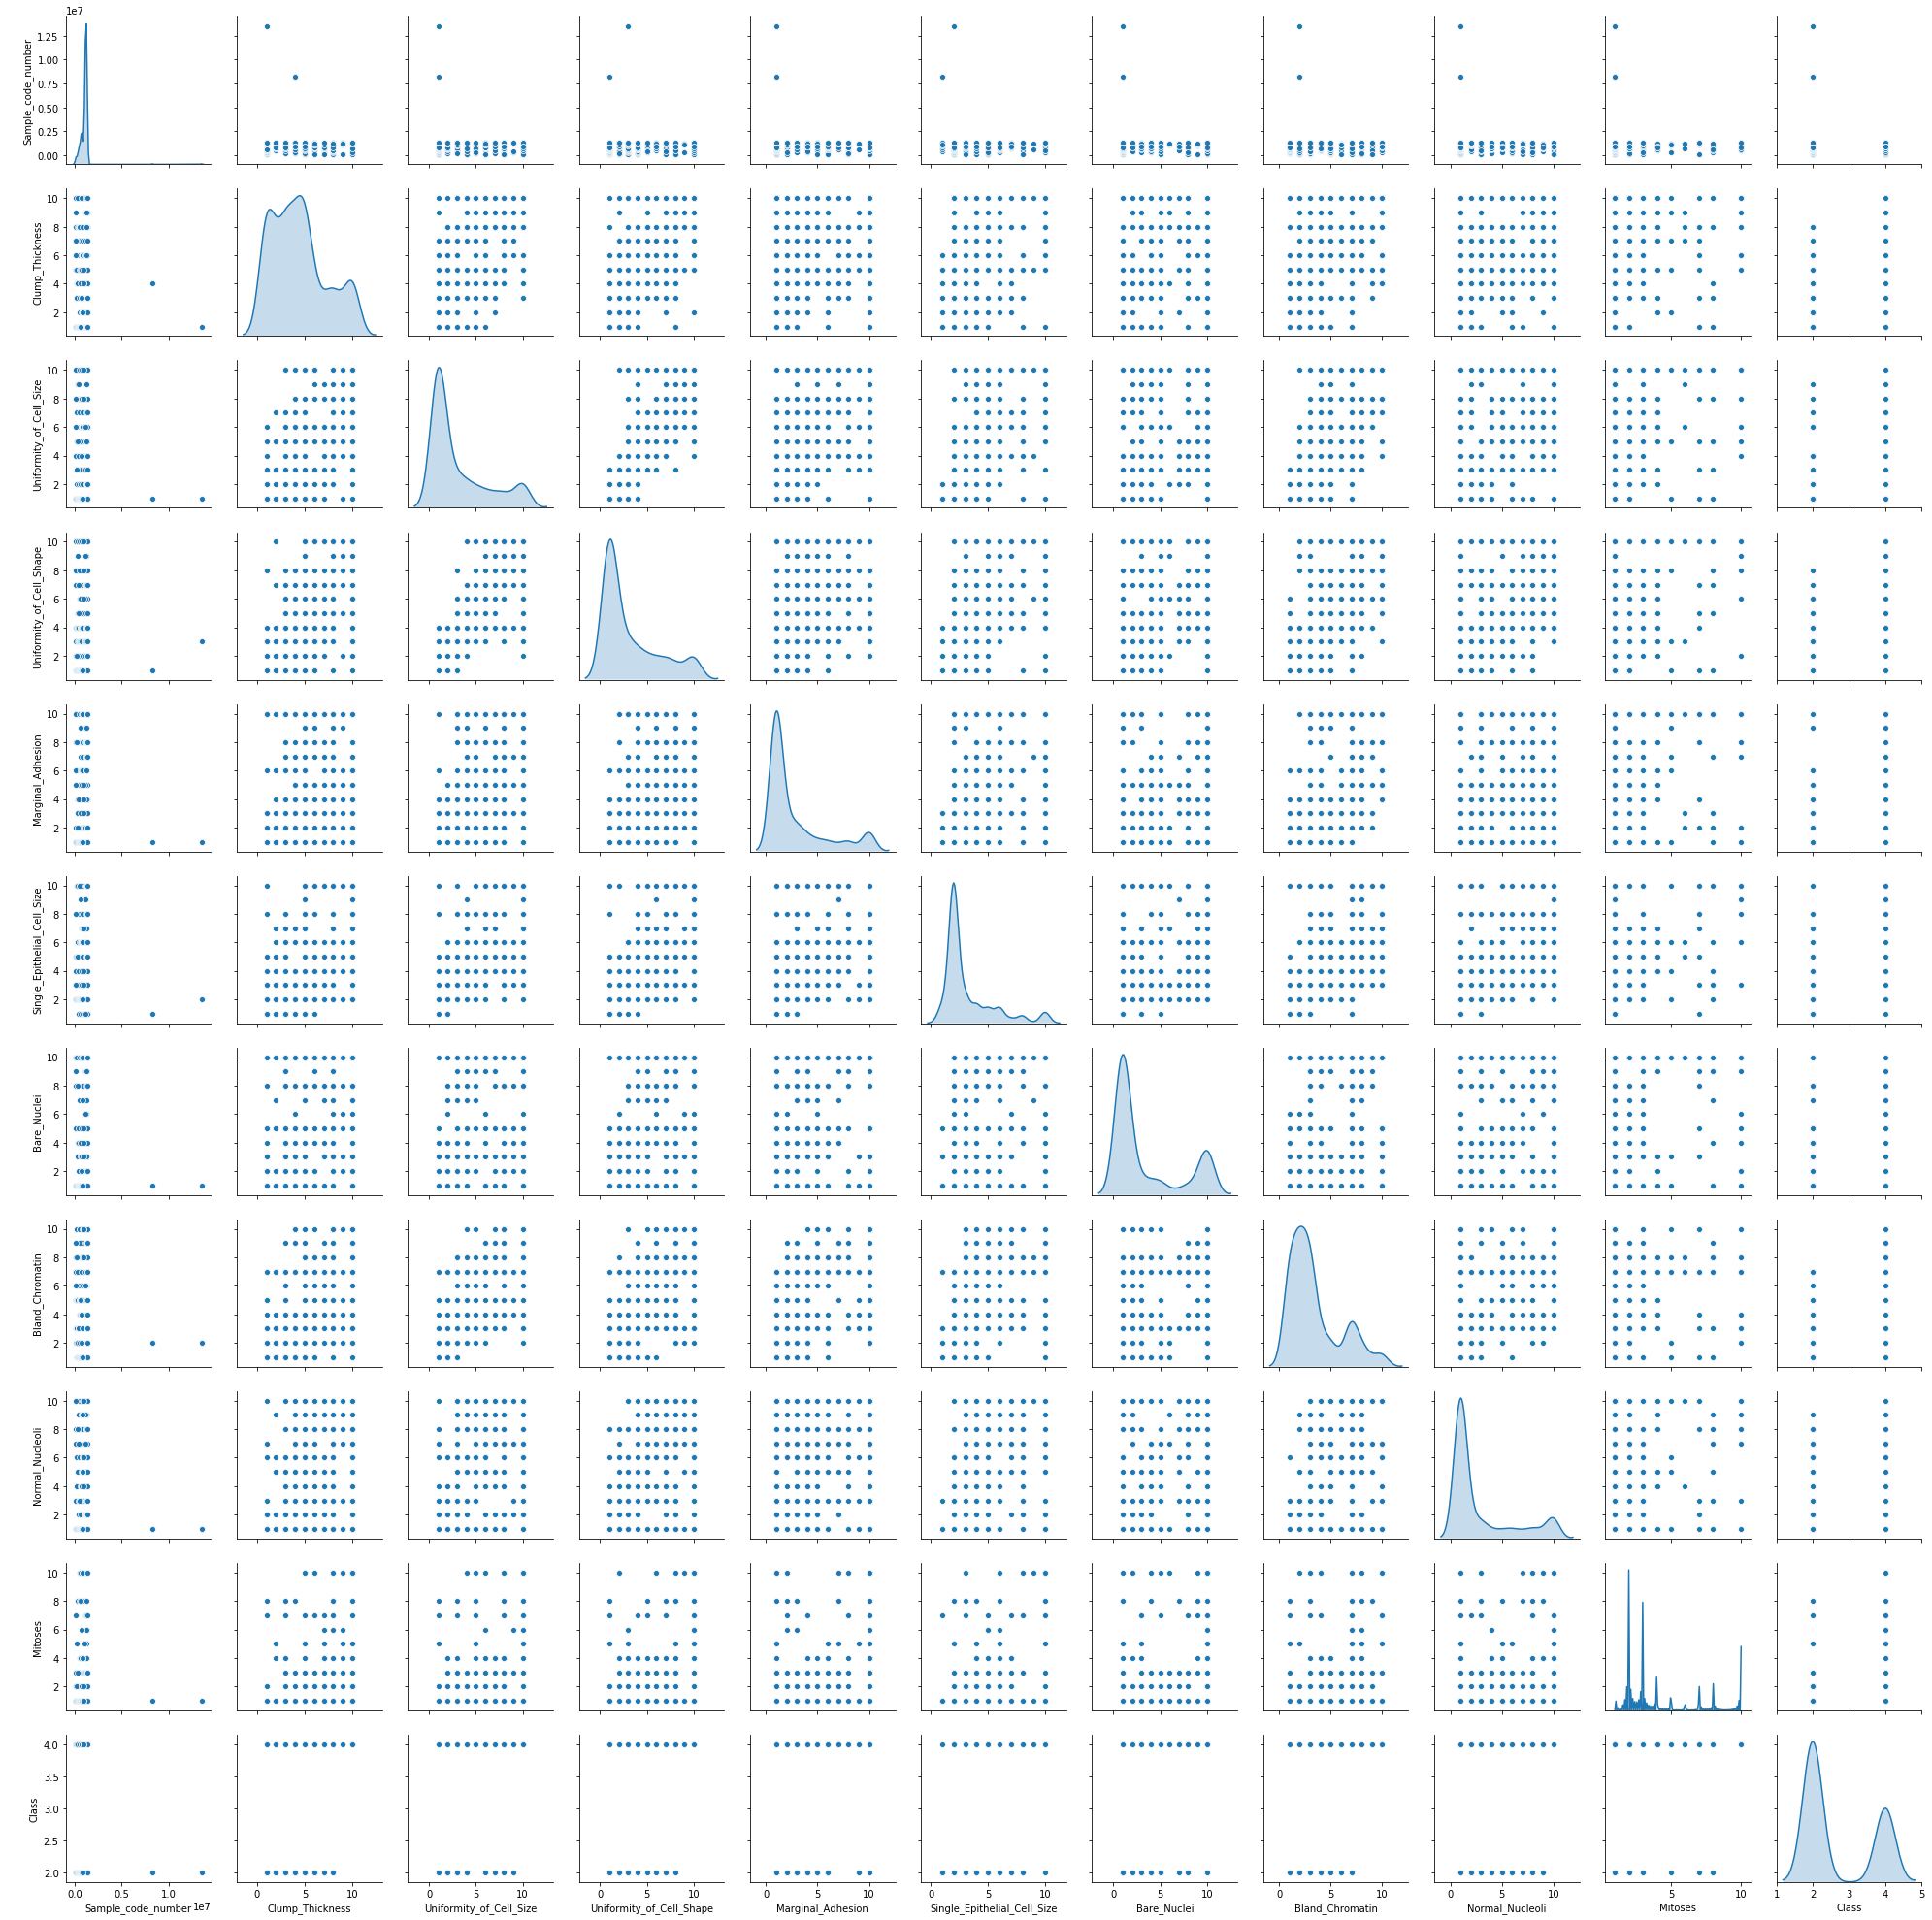

In [163]:
#Let us check for pair plots
sns.pairplot(c_data, diag_kind = 'kde')

In [164]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

Boxplot for: Clump_Thickness


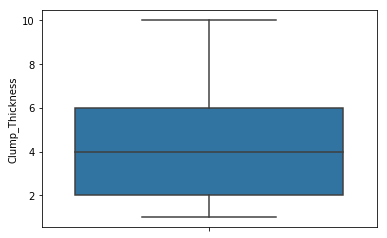

Boxplot for: Uniformity_of_Cell_Size


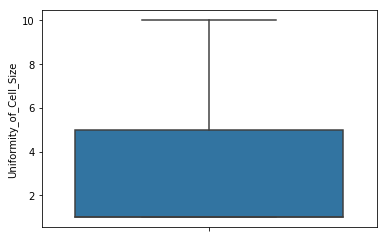

Boxplot for: Uniformity_of_Cell_Shape


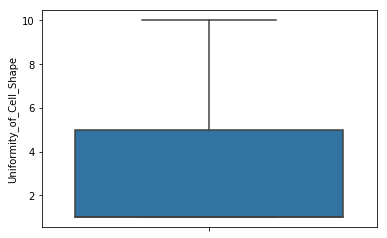

Boxplot for: Marginal_Adhesion


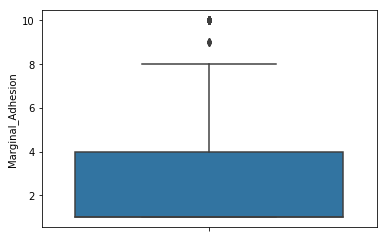

Boxplot for: Single_Epithelial_Cell_Size


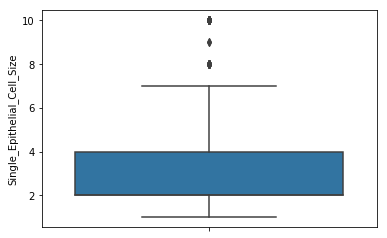

Boxplot for: Bare_Nuclei


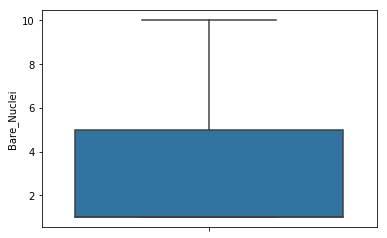

Boxplot for: Bland_Chromatin


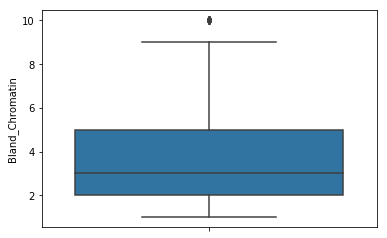

Boxplot for: Normal_Nucleoli


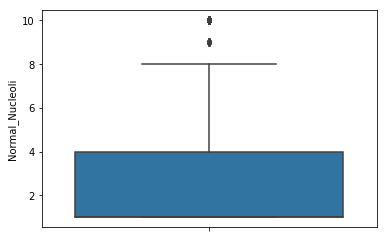

Boxplot for: Mitoses


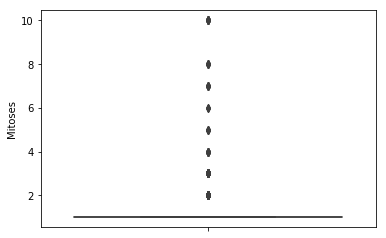

In [165]:
# generating box plots for all the columns.
for i in range(0,9):
    print("Boxplot for: "+c_data.drop(columns = 'Sample_code_number').columns[i])
    sns.boxplot(c_data.drop(columns = 'Sample_code_number').iloc[:,i], orient = 'v')
    plt.show()

From the above box-plots, we see that only 5 of the 10 columns have outliers. 
1. Marginal_Adhesion - above the value 8
2. Single_Epithelial_cell_size - above the value 7
3. Bland_chromatin - above the value 9
4. Normal_Nucleoli - above the value 8
5. Mitoses

### Mitoses

In [166]:
pd.crosstab(c_data["Mitoses"],c_data["Class"])

Class,2,4
Mitoses,,
1,440,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


### Normal_Nucleoli

In [167]:
pd.crosstab(c_data["Normal_Nucleoli"],c_data["Class"])

Class,2,4
Normal_Nucleoli,,
1,397,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [168]:
c_data["Normal_Nucleoli"] = np.where(c_data["Normal_Nucleoli"] > 8 , 8 , c_data["Normal_Nucleoli"])

In [169]:
pd.crosstab(c_data["Normal_Nucleoli"],c_data["Class"])

Class,2,4
Normal_Nucleoli,,
1,397,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,5,96


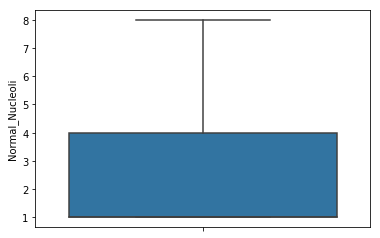

In [170]:
 sns.boxplot(c_data["Normal_Nucleoli"], orient = 'v')

### Bland_Chromatin

In [171]:
pd.crosstab(c_data["Bland_Chromatin"],c_data["Class"])

Class,2,4
Bland_Chromatin,,
1,149,2
2,158,7
3,126,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [172]:
c_data["Bland_Chromatin"] = np.where(c_data["Bland_Chromatin"] > 8 , 8 , c_data["Bland_Chromatin"])

In [173]:
pd.crosstab(c_data["Bland_Chromatin"],c_data["Class"])

Class,2,4
Bland_Chromatin,,
1,149,2
2,158,7
3,126,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,59


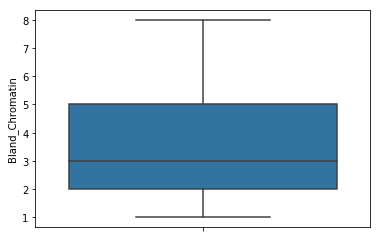

In [174]:
sns.boxplot(c_data["Bland_Chromatin"], orient = 'v')

### Single_Epithelial_Cell_Size

In [175]:
pd.crosstab(c_data["Single_Epithelial_Cell_Size"],c_data["Class"])

Class,2,4
Single_Epithelial_Cell_Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [176]:
c_data["Single_Epithelial_Cell_Size"] = np.where(c_data["Single_Epithelial_Cell_Size"] > 7 , 7 , c_data["Single_Epithelial_Cell_Size"])
pd.crosstab(c_data["Single_Epithelial_Cell_Size"],c_data["Class"])

Class,2,4
Single_Epithelial_Cell_Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,6,58


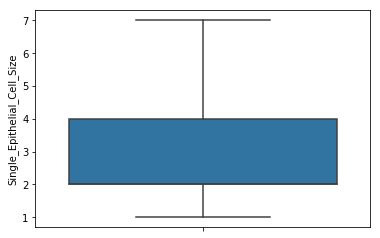

In [177]:
sns.boxplot(c_data["Single_Epithelial_Cell_Size"], orient = 'v')

### Marginal_Adhesion

In [178]:
pd.crosstab(c_data["Marginal_Adhesion"],c_data["Class"])

Class,2,4
Marginal_Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [179]:
c_data["Marginal_Adhesion"] = np.where(c_data["Marginal_Adhesion"] > 8 , 8 , c_data["Marginal_Adhesion"])
pd.crosstab(c_data["Marginal_Adhesion"],c_data["Class"])

Class,2,4
Marginal_Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,2,83


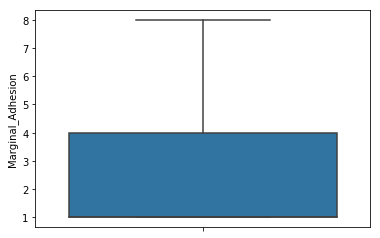

In [141]:
sns.boxplot(c_data["Marginal_Adhesion"], orient = 'v')

# Q6 Create a covariance matrix for identifying Principal components

In [201]:
# PCA
# Step 1 - Create covariance matrix

c_data_drped = c_data.drop(columns = {"Sample_code_number","Class"})

std_colnames = ('Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'
)

scaler = preprocessing.StandardScaler().fit(c_data_drped)
c_data_transformed = pd.DataFrame(scaler.transform(c_data_drped))
c_data_transformed.columns = std_colnames


covariance = c_data_transformed.cov()
covariance

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Clump_Thickness,1.001449,0.644272,0.654700,0.505901,0.546798,0.591697,0.574068,0.549160,0.350861
Uniformity_of_Cell_Size,0.644272,1.001449,0.906732,0.732086,0.781873,0.685783,0.758169,0.732378,0.460731
Uniformity_of_Cell_Shape,0.654700,0.906732,1.001449,0.706854,0.751746,0.705403,0.739343,0.727870,0.441231
Marginal_Adhesion,0.505901,0.732086,0.706854,1.001449,0.668028,0.689402,0.687325,0.633646,0.403213
Single_Epithelial_Cell_Size,0.546798,0.781873,0.751746,0.668028,1.001449,0.626544,0.661320,0.690071,0.459560
Bare_Nuclei,0.591697,0.685783,0.705403,0.689402,0.626544,1.001449,0.685622,0.601316,0.343517
Bland_Chromatin,0.574068,0.758169,0.739343,0.687325,0.661320,0.685622,1.001449,0.683331,0.343097
Normal_Nucleoli,0.549160,0.732378,0.727870,0.633646,0.690071,0.601316,0.683331,1.001449,0.423987
Mitoses,0.350861,0.460731,0.441231,0.403213,0.459560,0.343517,0.343097,0.423987,1.001449


# Q7 Identify eigen values and eigen vector

In [200]:
# Step 2- Get eigen values and eigen vector
w, v = LA.eig(covariance)

In [206]:
print("EigenValues")
print(w)

EigenValues
[6.01536699 0.76916925 0.53366557 0.09011192 0.43639039 0.25366129
 0.33485866 0.28403017 0.29578926]


In [205]:
print("EigenVectors")
print(v)

EigenVectors
[[-0.30050435  0.1013302  -0.88602585 -0.00283077 -0.01936238 -0.19504579
  -0.01077156 -0.27520458 -0.01039968]
 [-0.37708625  0.02984427  0.04066442 -0.73928626 -0.20562124  0.34196312
  -0.27759556  0.07260391  0.25916793]
 [-0.37342463  0.05933215 -0.02061752  0.65925577 -0.18428854  0.51657249
  -0.24798365  0.13814436  0.20149773]
 [-0.33790279  0.07575236  0.35377872  0.0563409   0.43484126 -0.05820436
  -0.12498484 -0.73085311  0.09750617]
 [-0.34662925 -0.07294477  0.2008811   0.07496879 -0.29057708 -0.5739005
  -0.50092985  0.16488524 -0.36964714]
 [-0.33239568  0.22065066 -0.04169782 -0.07824798  0.62277399  0.17254159
   0.09957978  0.42709501 -0.47225059]
 [-0.34532336  0.21843723  0.12852408  0.05689306  0.03878667 -0.43995888
   0.41900913  0.3136375   0.58675066]
 [-0.33835648 -0.01329166  0.15776114 -0.02316771 -0.46964547  0.14860968
   0.62926418 -0.22439613 -0.41344185]
 [-0.22250121 -0.93684771 -0.06497067  0.01177798  0.19985511 -0.00156094
   0.11540

# Q8 Find variance and cumulative variance by each eigen vector

In [207]:
w.sum()

9.01304347826087

In [211]:
## % variance captured/explained by each column.
w/(w.sum())*100

array([66.74068537,  8.53395689,  5.92103624,  0.99979456,  4.84176502,
        2.81437994,  3.71526728,  3.15132359,  3.28179112])

In [210]:
np.cumsum(w/(w.sum())*100)

array([ 66.74068537,  75.27464226,  81.19567849,  82.19547305,
        87.03723807,  89.85161801,  93.56688529,  96.71820888,
       100.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [223]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(c_data_transformed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [224]:
c_data_pca = pca.transform(c_data_drped)
c_data_pca.shape

(691, 9)

# Q10 Find correlation between components and features

In [240]:
pca.singular_values_

array([64.42517538, 23.03750809, 19.18930023, 17.35250318, 15.20041027,
       14.28616778, 13.99931476, 13.22975012,  7.88525355])

In [243]:
pca.components_

array([[ 0.30050435,  0.37708625,  0.37342463,  0.33790279,  0.34662925,
         0.33239568,  0.34532336,  0.33835648,  0.22250121],
       [-0.1013302 , -0.02984427, -0.05933215, -0.07575236,  0.07294477,
        -0.22065066, -0.21843723,  0.01329166,  0.93684771],
       [-0.88602585,  0.04066442, -0.02061752,  0.35377872,  0.2008811 ,
        -0.04169782,  0.12852408,  0.15776114, -0.06497067],
       [ 0.01936238,  0.20562124,  0.18428854, -0.43484126,  0.29057708,
        -0.62277399, -0.03878667,  0.46964547, -0.19985511],
       [ 0.01077156,  0.27759556,  0.24798365,  0.12498484,  0.50092985,
        -0.09957978, -0.41900913, -0.62926418, -0.11540655],
       [-0.01039968,  0.25916793,  0.20149773,  0.09750617, -0.36964714,
        -0.47225059,  0.58675066, -0.41344185,  0.08800516],
       [-0.27520458,  0.07260391,  0.13814436, -0.73085311,  0.16488524,
         0.42709501,  0.3136375 , -0.22439613,  0.08626463],
       [-0.19504579,  0.34196312,  0.51657249, -0.05820436, -0

In [241]:
rel_data = pd.DataFrame(pca.components_)
rel_data.columns = std_colnames
rel_data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.300504,0.377086,0.373425,0.337903,0.346629,0.332396,0.345323,0.338356,0.222501
1,-0.101330,-0.029844,-0.059332,-0.075752,0.072945,-0.220651,-0.218437,0.013292,0.936848
2,-0.886026,0.040664,-0.020618,0.353779,0.200881,-0.041698,0.128524,0.157761,-0.064971
3,0.019362,0.205621,0.184289,-0.434841,0.290577,-0.622774,-0.038787,0.469645,-0.199855
4,0.010772,0.277596,0.247984,0.124985,0.500930,-0.099580,-0.419009,-0.629264,-0.115407
5,-0.010400,0.259168,0.201498,0.097506,-0.369647,-0.472251,0.586751,-0.413442,0.088005
6,-0.275205,0.072604,0.138144,-0.730853,0.164885,0.427095,0.313638,-0.224396,0.086265
7,-0.195046,0.341963,0.516572,-0.058204,-0.573901,0.172542,-0.439959,0.148610,-0.001561
8,0.002831,0.739286,-0.659256,-0.056341,-0.074969,0.078248,-0.056893,0.023168,-0.011778


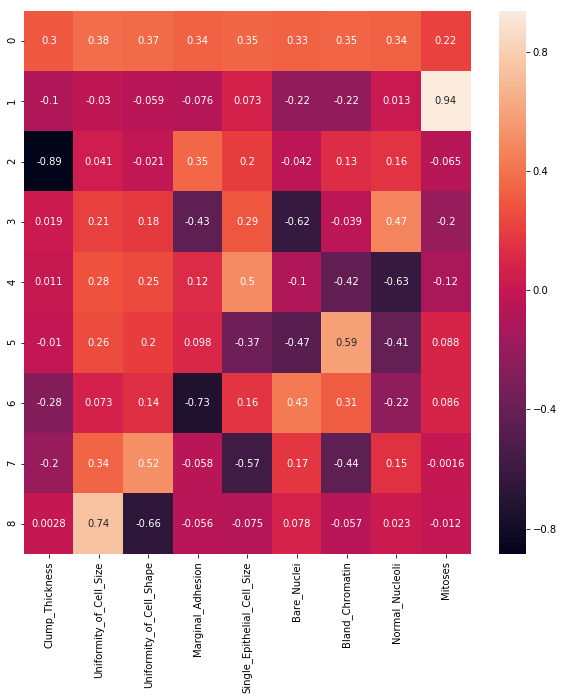

In [245]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rel_data, annot = True)
plt.show()

In [226]:
pca.explained_variance_

array([6.01536699, 0.76916925, 0.53366557, 0.43639039, 0.33485866,
       0.29578926, 0.28403017, 0.25366129, 0.09011192])

In [227]:
pca.explained_variance_ratio_*100

array([66.74068537,  8.53395689,  5.92103624,  4.84176502,  3.71526728,
        3.28179112,  3.15132359,  2.81437994,  0.99979456])

In [228]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 66.74068537,  75.27464226,  81.19567849,  86.03744352,
        89.7527108 ,  93.03450192,  96.1858255 ,  99.00020544,
       100.        ])

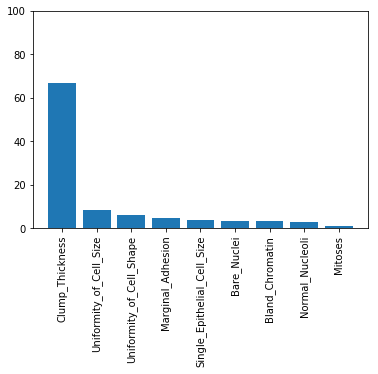

In [239]:
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.bar(std_colnames,pca.explained_variance_ratio_*100)
plt.show()

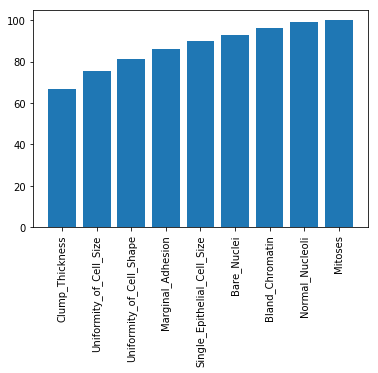

In [236]:
plt.xticks(rotation=90)
plt.bar(std_colnames,np.cumsum(pca.explained_variance_ratio_*100))
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [247]:
j_data = pd.read_csv("jokes.csv")
j_data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [249]:
j_data.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [250]:
ratings = j_data.iloc[0:200,:]

In [252]:
ratings.shape

(200, 101)

# Q13 Change the column indices from 0 to 99

In [254]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 157.9 KB


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [257]:
ratings.replace(99.00, 0)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [262]:
scaler = preprocessing.StandardScaler().fit(ratings.drop(columns = "NumJokes"))
ratings_diff = pd.DataFrame(scaler.transform(ratings.drop(columns = "NumJokes")))
ratings_diff.columns = ratings.drop(columns = "NumJokes").columns
ratings_diff

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,-0.593006,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,-0.207319,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,2.269575,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,-0.410922,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,-0.303603,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834
5,-0.797374,-0.583525,-0.728955,-1.072902,-1.301062,-0.790424,-1.578608,-0.161811,-0.984348,-0.511344,...,-1.536632,-1.501198,-1.369490,-1.386409,-1.426499,-1.441815,-1.274105,-1.605313,-1.373243,-1.514384
6,1.538226,2.081847,1.356697,1.069553,1.591786,-0.914110,1.344707,1.830154,1.171165,2.269575,...,0.700489,0.740224,0.773171,0.772626,0.740124,-1.320709,0.806302,0.707782,0.789401,0.708077
7,-0.508450,-0.409369,-0.544217,-1.027262,-1.498469,-0.731825,1.620828,0.308342,-0.954561,-0.583626,...,-1.301662,-1.379062,-1.357023,-1.444006,-1.447485,-1.441815,-1.230163,-1.412056,-1.241052,-1.439543
8,-0.744519,-0.583525,-0.937605,-1.040815,-1.605475,-0.700288,-0.972924,-1.823844,-1.009035,-0.505827,...,-1.364059,-1.361493,-1.265238,-1.329871,-1.386028,-1.376571,-1.281253,-1.417192,-1.338948,-1.546924
9,-0.593506,-0.357642,-0.629285,-0.843509,1.189591,-0.578616,1.560259,0.537233,-0.787261,-0.236563,...,0.700489,-1.260736,0.773171,0.772626,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [273]:
means = ratings_diff.mean()
means.size

100

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [268]:
means = means.sort_values(ascending=False)

In [272]:
means.head(10)

Joke88    2.831069e-16
Joke85    2.642331e-16
Joke4     2.536860e-16
Joke96    2.342571e-16
Joke73    2.153833e-16
Joke71    1.743050e-16
Joke94    1.676437e-16
Joke84    1.665335e-16
Joke97    1.476597e-16
Joke64    1.426637e-16
dtype: float64